In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df= pd.read_csv("titanic_train.csv")
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [5]:
df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [6]:
df.info() #this give us information on the numbers of missing data,
#the kinds of objects we have and the number of rows and column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
passenger_id    850 non-null int64
pclass          850 non-null int64
name            850 non-null object
sex             850 non-null object
age             676 non-null float64
sibsp           850 non-null int64
parch           850 non-null int64
ticket          850 non-null object
fare            849 non-null float64
cabin           191 non-null object
embarked        849 non-null object
boat            308 non-null object
body            73 non-null float64
home.dest       464 non-null object
survived        850 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [7]:
df.isnull().sum()  #This code shows the total number of missing values in the dataset titanic

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

The first thing i would do to age is fill the missing values i would use the mean to fill it so it would still be uniform and wouldnt affect the data in many ways.

In [8]:
df["age"].fillna((df["age"].median()), inplace=True)
#This fill all the missing columns in age with the median, inplace helps us make the change permanent

In [16]:
df['age']= (df['age']//10)*10
#i want to set all the data in age column to be in a range of 10,20,30,40,50,60 etc. so it would be easy for me to plot

In [27]:
#i want to sort all the values in age so i would be able to plot the data easily
df.sort_values(by=['age'], inplace=True)

In [34]:
df['age'].value_counts(sort=False) #i used false because normally it would start from the maximum to minimum and
#that would affect the graph  

0.0      56
10.0     99
20.0    394
30.0    152
40.0     72
50.0     52
60.0     20
70.0      4
80.0      1
Name: age, dtype: int64

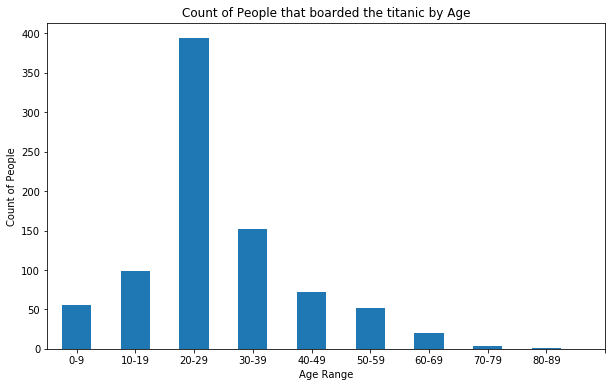

In [35]:
df['age'].value_counts(sort=False).plot(kind='bar', figsize=(10,6), rot=0) 
plt.xlabel("Age Range")
plt.ylabel("Count of People" )
plt.title("Count of People that boarded the Titanic by Age" )
plt.xticks(ticks=(np.arange(0,10)), labels=('0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89'))
plt.show()